<a href="https://colab.research.google.com/github/Walt9819/factores-impacto-desempleo-mexico/blob/main/Python/FactoresDeImpactoEnDesempleoMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BEDU - Santander
## *Módulo 2. Procesamiento de Datos con Python*

**Equipo 18**

Integrantes:
- Irene López [ver perfil](https://www.linkedin.com/in/irene-lopez-rodriguez/)
- Laura Lozano [ver perfil](https://www.linkedin.com/in/laura-lozano-bautista/)
- Enrique Rodríguez [ver perfil](https://www.linkedin.com/in/enrique-rodriguez97/)
- Walter Rosales [ver perfil]()



# Tema: **Impacto del confinamineto en el sector restaurantero y de alojamiento en México**

## Identificación del problema
La pandemia de COVID-19 en México trajo consigo desempleo e inactividad, ya sea por incompatibilidad de los horarios personales con el trabajo en línea, recortes administrativos o falta de herramientas tecnológicas. Asimismo, las personas que se mantuvieron ocupadas durante este periodo vieron un cambio en la calidad de su empleo, pues los costos económicos de las medidas sanitarias que las autoridades tomaron se vieron reflejados en la reducción de la oferta laboral (implicando así una mayor carga laboral para los empleados que permanecieron en las empresas), una menor capacidad utilizada y el funcionamiento de las cadenas de valor.

En los Pre-Criterios 2021 de la SHCP se menciona que los sectores que se vieron afectados de manera más inmediata y persistente son los servicios de alojamiento, esparcimiento, comercio, transporte, y aquellos sectores mayormente dependientes del turismo local y foráneo. Por otra parte, el comercio electrónico y los servicios de telecomunicaciones y tecnologías de la información, así como la venta de productos farmacéuticos se vieron favorecidos por el aumento de la demanda de sus productos y servicios. 

Según estimaciones de la Cámara Nacional de la Industrial Restaurantera y de Alimentos Condimentados (CANIRAC), para finales de 2020 se acumuló una pérdida  de 450 mil empleos en la industria restaurantera, de los 2.1 millones que mantenía dicho sector a inicio de año. También prevé que el 50% del sector restaurantero tendrá dificultad para negociar deudas por crédito o pagos de nóminas, debido al impacto que ha provocado el cierre de establecimientos, reducción de horarios y aforo. Entre los estados más afectados por la pérdida de empleo se encuentran: Ciudad de México, Estado de México, Baja California, Chihuahua y Sonora, además, no se descarta que la cifra se incremente en caso de endurecerse las medidas de confinamiento.


## Objetivo
> Analizar la situación del empleo en México durante el 2020 en los sectores de la actividad económica, haciendo especial énfasis en las condiciones laborales del sector restaurantero y de alojamiento.


## Preguntas de investigación
*	¿Cómo son las condiciones laborales de las personas que permanecieron en la ocupación durante la pandemia de COVID-19? 
*	¿Qué pasó con los trabajadores de los sectores más afectados? 
*	¿Cuál fue la condición laboral más precarizada en el sector restaurantero y de alojamiento?
*	¿Qué parte de la estructura productiva fue la más golpeada: micros, pequeñas, medianas o grandes empresas?


## Recolección de datos

La fuente de datos para estre proyecto es la ENOE -para el segundo trimestre de 2020 se utiliza a la ETOE- del INEGI, para el periodo del primer trimestre al cuarto trimestre del 2020.


**NOTA**: Para conocer la codificación de las **variables disponibles** en el Cuestionario Sociodemográfico de la ENOE, revisar la siguiente documentación https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/fd_c_bas_amp_15ymas.pdf

**NOTA IMPORTANTE:** Solo descargar si no están los datos disponibles en el directorio de trabajo o si se desean actualizar los datos para incluir más trimestres de diferentes años

In [ ]:
# Correr sólo una vez
!pip3 install zipfile38
!pip3 install dbfread

In [ ]:
import requests, sys, io # lectura desde URL
import zipfile38 as zipfile # apoyos para lecturas de ZIP

import pandas as pd # usar dataframes
import os # manipulación de archivos en el sistema

from dbfread import DBF # lectura de archivos .dbf

# Lectura de los archivos del cuestionario sociodemográfico de la ENOE
zips = ["SDEMT0420", "SDEMT0520", "SDEMT0620", "SDEMT120", "enoen_sdemt320", "SDEMT420"]

for zip in zips:
  r = requests.get(f"https://github.com/Walt9819/factores-impacto-desempleo-mexico/blob/main/R/Project/enoe_sdem/{zip}.zip?raw=true")
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall("")


# Columnas a leer
columnas = ["SEX", "EDA", "NIV_INS", "RAMA_EST2", "CLASE2", "PER", "DUR_EST", "ING7C", "MEDICA5C", "EMPLE7C"]

# Conjunto de datos a llenar
data = pd.DataFrame()


# Leer todos los archivos `.dbf`
for file in os.listdir():
    if file.endswith(".dbf"):
      table = DBF(file, load=True)
      print(f"Load {file} succesfully\nTransforming data..")
      table = pd.DataFrame(iter(table))
      print("Adding data to main dataframe...")
      data = data.append(table[columnas])

# Sólo nos quedamos con las personas ocupadas (codificado como 1)

data = data.drop(data[data['CLASE2']>1].index)

#Export to data
data.to_csv("data_enoe_amp.csv", encoding="utf-8", index=False) # exportar a un CVS (de forma local)

Load ENOEN_SDEMT420.dbf succesfully
Transforming data..
Adding data to main dataframe...
Load SDEMT0520.dbf succesfully
Transforming data..
Adding data to main dataframe...
Load SDEMT0620.dbf succesfully
Transforming data..
Adding data to main dataframe...
Load SDEMT120.dbf succesfully
Transforming data..
Adding data to main dataframe...
Load enoen_sdemt320.dbf succesfully
Transforming data..
Adding data to main dataframe...
Load SDEMT0420.dbf succesfully
Transforming data..
Adding data to main dataframe...


In [ ]:
from google.colab import files
files.download("data_enoe_amp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Lectura de datos

In [76]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Lectura de datos y creación de DataFrame
df = pd.read_csv("https://github.com/Walt9819/factores-impacto-desempleo-mexico/blob/main/Python/data/data_enoe_amp.csv?raw=true", encoding="utf-8")

df

,SEX,EDA,NIV_INS,RAMA_EST2,CLASE2,PER,DUR_EST,ING7C,MEDICA5C,EMPLE7C
0,2.0,8.0,1,0,0,420,0,0,0,0
1,2.0,46.0,4,7,1,420,4,2,1,2
2,1.0,46.0,4,7,1,420,2,1,1,1
3,2.0,1.0,0,0,0,420,0,0,0,0
4,1.0,4.0,0,0,0,420,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
287226,NaN,NaN,0,0,0,220,0,0,0,0
287227,NaN,NaN,0,0,0,220,0,0,0,0
287228,2.0,12.0,0,0,0,220,0,0,0,0
287229,NaN,NaN,0,0,0,220,0,0,0,0


In [12]:
# Tamaño de DataFrame: 287,231 registros y 10 columnas
df.shape

(287231, 10)

In [13]:
# Primeros registros
df.head()

,SEX,EDA,NIV_INS,RAMA_EST2,CLASE2,PER,DUR_EST,ING7C,MEDICA5C,EMPLE7C
0,2.0,8.0,1,0,0,420,0,0,0,0
1,2.0,46.0,4,7,1,420,4,2,1,2
2,1.0,46.0,4,7,1,420,2,1,1,1
3,2.0,1.0,0,0,0,420,0,0,0,0
4,1.0,4.0,0,0,0,420,0,0,0,0


In [14]:
# Últimos registros
df.tail()

,SEX,EDA,NIV_INS,RAMA_EST2,CLASE2,PER,DUR_EST,ING7C,MEDICA5C,EMPLE7C
287226,NaN,NaN,0,0,0,220,0,0,0,0
287227,NaN,NaN,0,0,0,220,0,0,0,0
287228,2.0,12.0,0,0,0,220,0,0,0,0
287229,NaN,NaN,0,0,0,220,0,0,0,0
287230,NaN,NaN,0,0,0,220,0,0,0,0


In [15]:
# Tipos de datos
df.dtypes

SEX          float64
EDA          float64
NIV_INS        int64
RAMA_EST2      int64
CLASE2         int64
PER            int64
DUR_EST        int64
ING7C          int64
MEDICA5C       int64
EMPLE7C        int64
dtype: object

## Limpieza de datos

Para comenzar con la limpieza, cambiamos los nombres de las columnas para un mejor entendimiento.

In [16]:
print(list(df.columns))

# Cambio de nombre de columnas
df.columns = ['sexo', 'edad', 'niv_educ', 'sector', 'ocu', 'periodo', 'jor_lab',
       'niv_ing', 'inst_salud', 'uni_eco']
print(list(df.columns))

['SEX', 'EDA', 'NIV_INS', 'RAMA_EST2', 'CLASE2', 'PER', 'DUR_EST', 'ING7C', 'MEDICA5C', 'EMPLE7C']
['sexo', 'edad', 'niv_educ', 'sector', 'ocu', 'periodo', 'jor_lab', 'niv_ing', 'inst_salud', 'uni_eco']


In [17]:
# Identificamos la cantidad de datos faltantes
df.isna().sum()

sexo          14065
edad          14065
niv_educ          0
sector            0
ocu               0
periodo           0
jor_lab           0
niv_ing           0
inst_salud        0
uni_eco           0
dtype: int64

Los valores faltantes en este caso no sirven para nuestro análisis, por lo que procedemos a eliminarlos.

In [18]:
 # Eliminar filas con NaN
df.dropna(axis=0, how='any',inplace=True)

## Transformación de datos

Comenzamos haciento un cast de los tipos de variables que esten mal.

In [19]:
# Transformacion de datos float a int
df['sexo'] = df['sexo'].astype(int)
df['edad'] = df['edad'].astype(int)

df.dtypes

sexo          int64
edad          int64
niv_educ      int64
sector        int64
ocu           int64
periodo       int64
jor_lab       int64
niv_ing       int64
inst_salud    int64
uni_eco       int64
dtype: object

Filtramos la información.

In [20]:
# Filtros:

# Personas que están ocupadas

ocupadas = df['ocu']==1

# Personas que están en edad de trabajar, es decir, a los mayores de 15 años y menores de 65 años

mayores_15 = df['edad']>=15
menores_65 = df['edad']<=65

# Nivel educativo especificado

filtro_niv_educ = df['niv_educ']<5

# Jornada laboral especificada

filtro_jor_lab = df['jor_lab']<6

# Nivel de ingresos  especificado

filtro_niv_ing = df['niv_ing']<7

# Acceso a institución de salud especificado

filtro_inst_salud = df['inst_salud']<5

# Tamaño de la unidad económica especificada

filtro_uni_eco = df['uni_eco']<7


# Unión de filtros

df = df[ocupadas & mayores_15 & menores_65 & filtro_niv_educ & filtro_jor_lab & filtro_niv_ing & filtro_inst_salud & filtro_uni_eco]

df.head()

,sexo,edad,niv_educ,sector,ocu,periodo,jor_lab,niv_ing,inst_salud,uni_eco
1,2,46,4,7,1,420,4,2,1,2
2,1,46,4,7,1,420,2,1,1,1
9,1,40,4,8,1,420,4,4,4,6
10,2,41,4,3,1,420,2,1,1,1
13,2,49,3,10,1,420,3,1,1,1


Agregamos etiquetas de las variables a nuestro dataframe.

In [21]:
# Etiquetas de variables

# Sector
codigo_sector = {
    1 : 'Agropecuario',
    2 : 'Mineria y electricidad',
    3 : 'Manufactura', 
    4 : 'Construcción',
    5 : 'Comercio',
    6 : 'Restaurantes y servicios de alojamiento',
    7 : 'Transportes, comunicaciones, correo y almacenamiento',
    8 : 'Servicios profesionales, financieros y corporativos',
    9 : 'Servicios sociales',
    10 : 'Servicios diversos',
    11 : 'Gobierno y organismos internacionales'
}

df['sector_label'] = df['sector'].map(codigo_sector)

# Nivel educativo
codigo_educ = {
    1 : 'Primaria incompleta',
    2 : 'Primaria completa',
    3 : 'Secundaria completa', 
    4 : 'Media superior',
}

df['educacion_label'] = df['niv_educ'].map(codigo_educ)

# Jornada laboral
codigo_jor = {
    1 : 'Ausentes temporales con población ocupada vínculo laboral',
    2 : 'Menos de 15 horas',
    3 : 'De 15 a 34 horas', 
    4 : 'De 35 a 48 horas',
    5 : 'Más de 48 horas'
}

df['jornada_label'] = df['jor_lab'].map(codigo_jor)

# Nivel de ingresos
codigo_ingresos = {
    1 : 'Hasta un salario mínimo',
    2 : 'Más de 1 hasta 2 salarios mínimos',
    3 : 'Más de 2 hasta 3 salarios mínimos',
    4 : 'Más de 3 hasta 5 salarios mínimos',
    5 : 'Más de 5 salarios mínimos',
    6 : 'No recibe ingresos'
}

df['ingresos_label'] = df['niv_ing'].map(codigo_ingresos)


# Institucion de salud
codigo_salud = {
    1 : 'Sin prestaciones',
    2 : 'Solo acceso a instituciones de salud',
    3 : 'Acceso de instituciones de salud y otras prestaciones',
    4 : 'No tiene acceso a instituciones de salud, pero si a otras prestaciones'
}

df['inst_salud_label'] = df['inst_salud'].map(codigo_salud)


# Tamaño unidad económica
codigo_unidad = {
    1 : 'Micro',
    2 : 'Micro',
    3 : 'Micro',
    4 : 'Pequeña',
    5 : 'Pequeña',
    6 : 'Mediana-Grande',
}

df['uni_eco_label'] = df['uni_eco'].map(codigo_unidad)

df.head()

,sexo,edad,niv_educ,sector,ocu,periodo,jor_lab,niv_ing,inst_salud,uni_eco,sector_label,educacion_label,jornada_label,ingresos_label,inst_salud_label,uni_eco_label
1,2,46,4,7,1,420,4,2,1,2,"Transportes, comunicaciones, correo y almacena...",Media superior,De 35 a 48 horas,Más de 1 hasta 2 salarios mínimos,Sin prestaciones,Micro
2,1,46,4,7,1,420,2,1,1,1,"Transportes, comunicaciones, correo y almacena...",Media superior,Menos de 15 horas,Hasta un salario mínimo,Sin prestaciones,Micro
9,1,40,4,8,1,420,4,4,4,6,"Servicios profesionales, financieros y corpora...",Media superior,De 35 a 48 horas,Más de 3 hasta 5 salarios mínimos,"No tiene acceso a instituciones de salud, pero...",Mediana-Grande
10,2,41,4,3,1,420,2,1,1,1,Manufactura,Media superior,Menos de 15 horas,Hasta un salario mínimo,Sin prestaciones,Micro
13,2,49,3,10,1,420,3,1,1,1,Servicios diversos,Secundaria completa,De 15 a 34 horas,Hasta un salario mínimo,Sin prestaciones,Micro


## Gráficas

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Ejemplo gráfica de barras: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# 1. Gráfica de barras: Ocupación por sector y por trimestre


# Ejemplo gráfica de barras horizontal: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

# 2. Sectores y nivel de ingreso (Por trimestres)


# 3. Sector y jornada laboral (Por trimestres)


# Ejemplo de gráfica de pie: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# 4. Pie: Acceso a instituciones de salud sólo del sector restaurantero (por trismestres)


# 5. Gráfica de barras: Número de empleados por cada tamaño de unidad económica del sector restaurantero (por trismestres)


## **1. Gráfica de barras: Ocupación por sector y por trimestre**

Agrupamos los datos que necesitaremos en nuestro análisis.

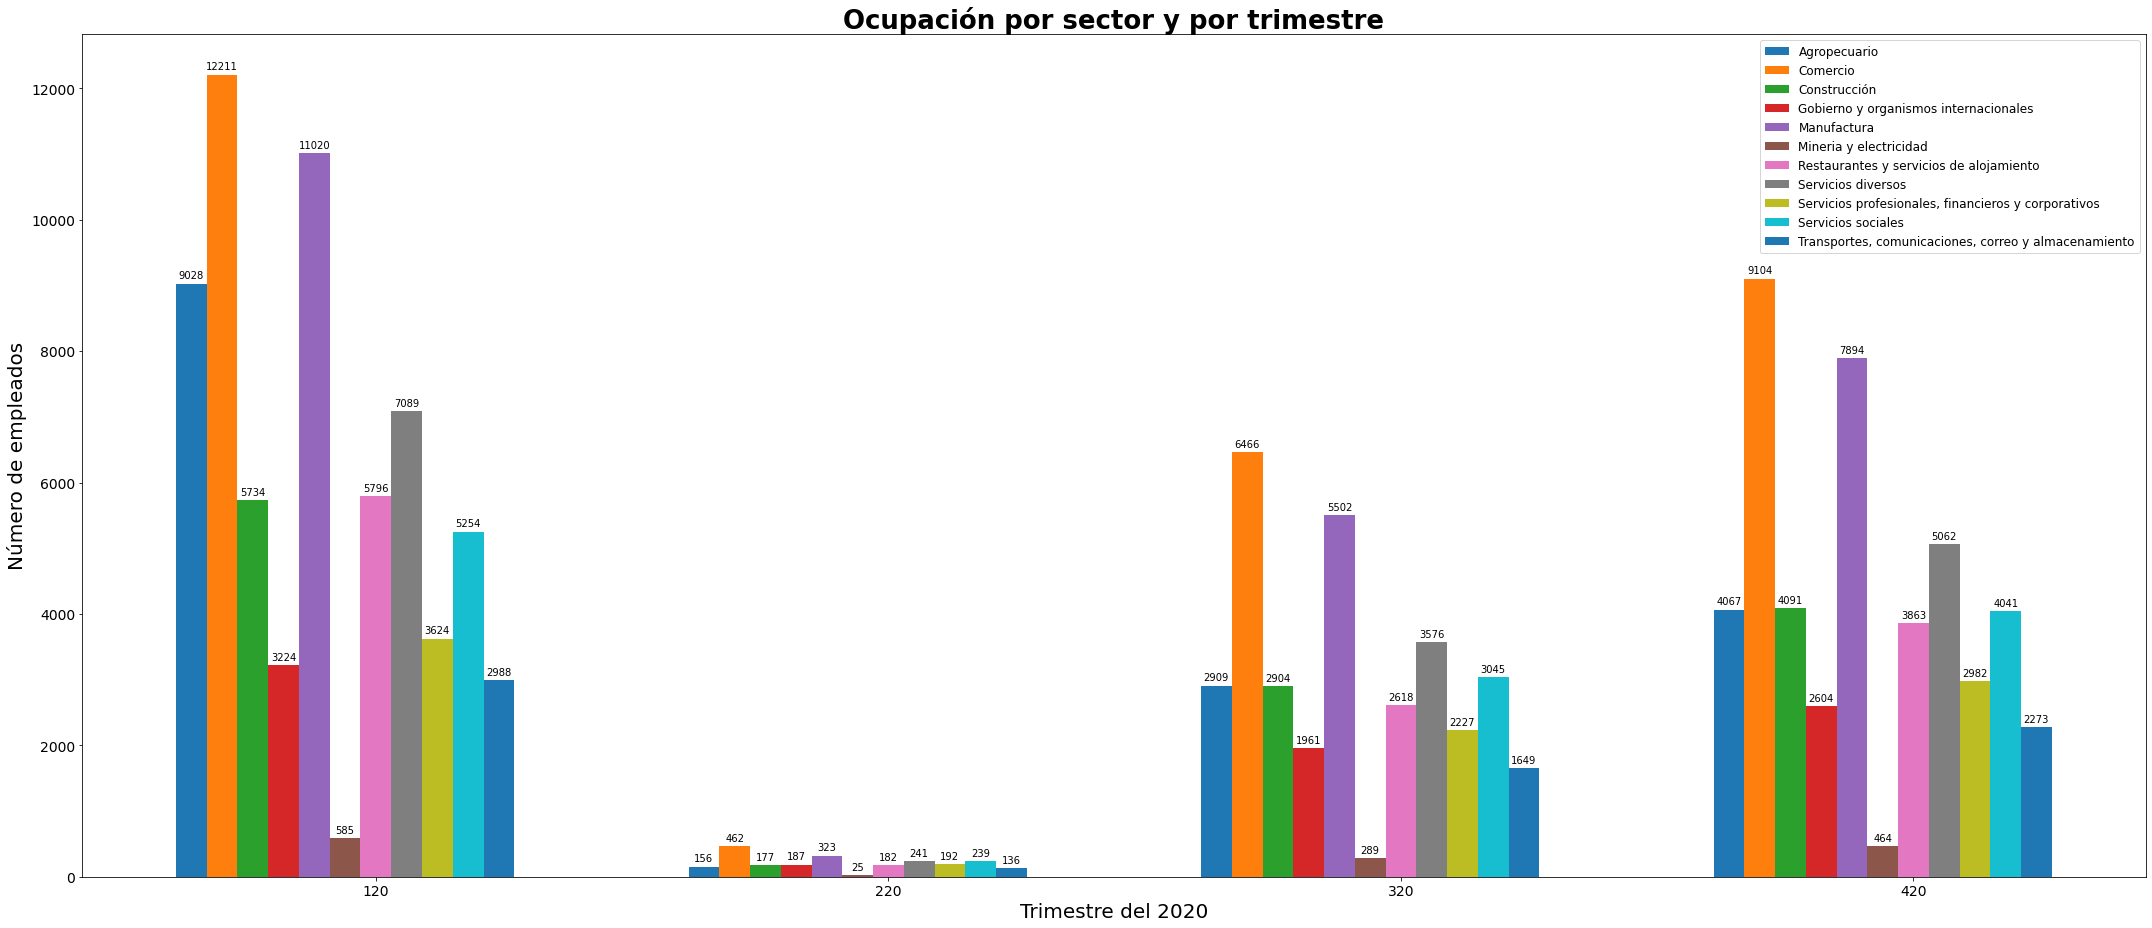

In [147]:
group1 = df.groupby(by = ['periodo','sector_label'])['ocu']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.06

sectores = list(data1['sector_label'].drop_duplicates())
l = len(sectores)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for i in range(l):
  pos = -(l+1)/2 + i
  rect = ax.bar(x + pos*width,data1[data1['sector_label'] == sectores[i]].cantidad,width)
  autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos)

ax.set_title('Ocupación por sector y por trimestre')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Trimestre del 2020')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de empleados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = sectores,fontsize = 12,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

## **2. Sectores y nivel de ingreso (Por trimestres)**

Agrupamos los datos que necesitaremos en nuestro análisis.

In [179]:
group2 = df.groupby(by = ['sector_label','ingresos_label'])['ingresos_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)

#Sacamos el valor máximo para las gráficas
max_value = data2.values.max()

### Primer trimestre 2020

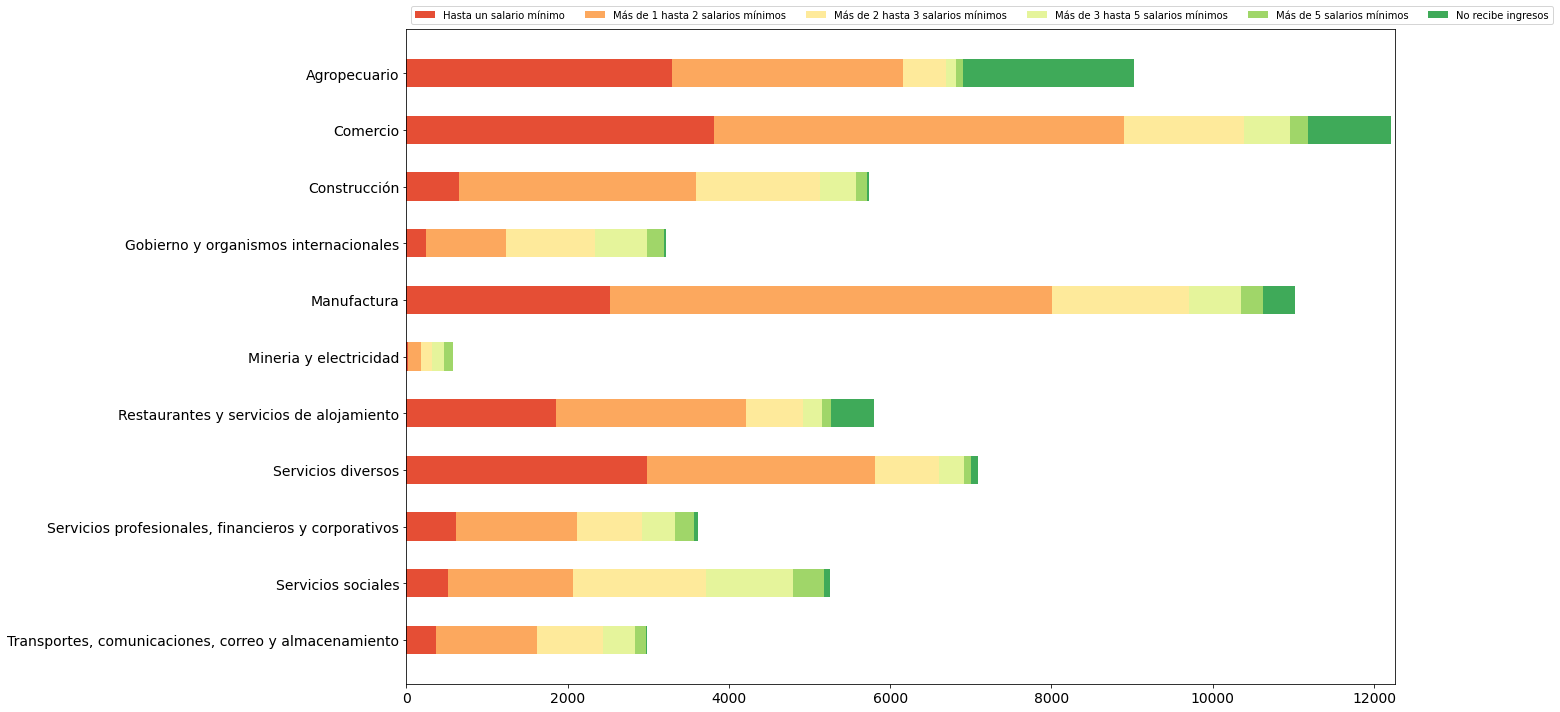

In [180]:
group2 = df[df['periodo'] == 120].groupby(by = ['sector_label','ingresos_label'])['ingresos_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

### Segundo trimestre 2020

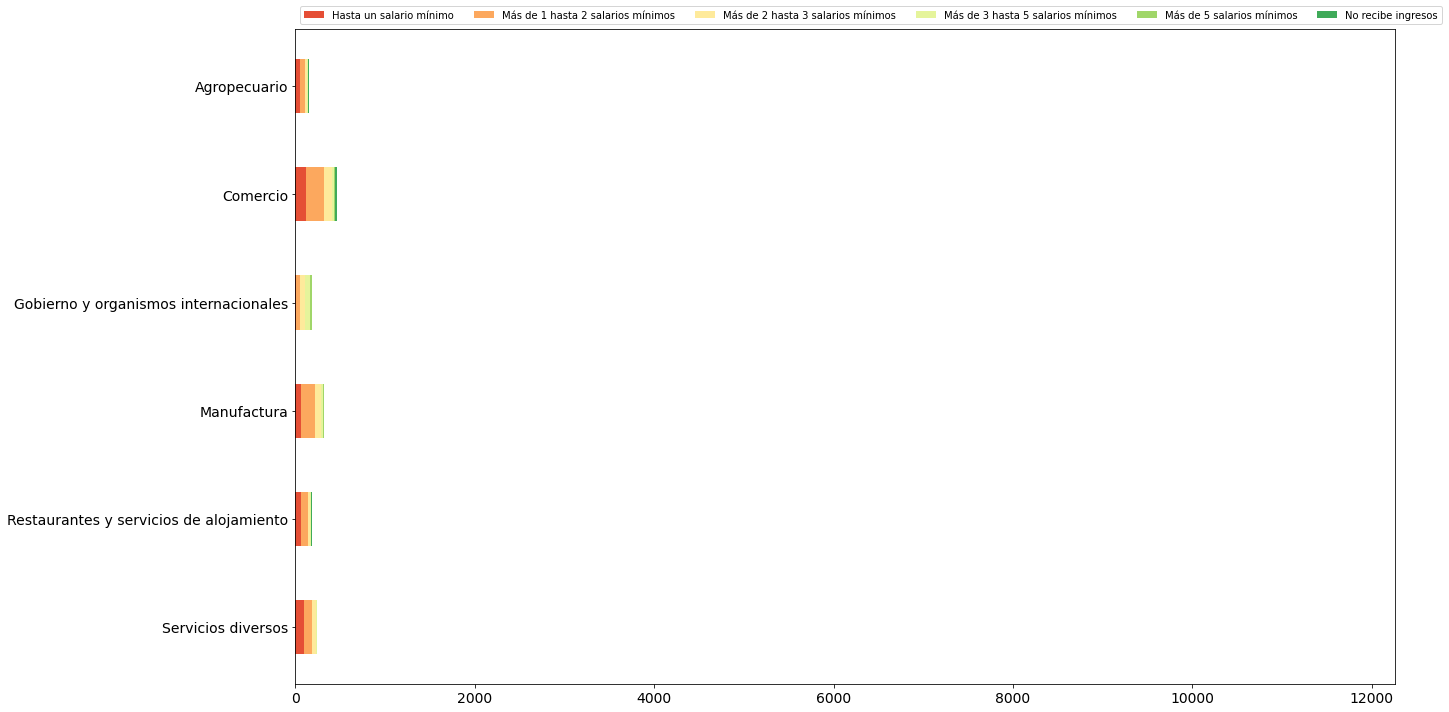

In [181]:
group2 = df[df['periodo'] == 220].groupby(by = ['sector_label','ingresos_label'])['ingresos_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)
data2.dropna(inplace=True)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

### Tercer trimestre 2020

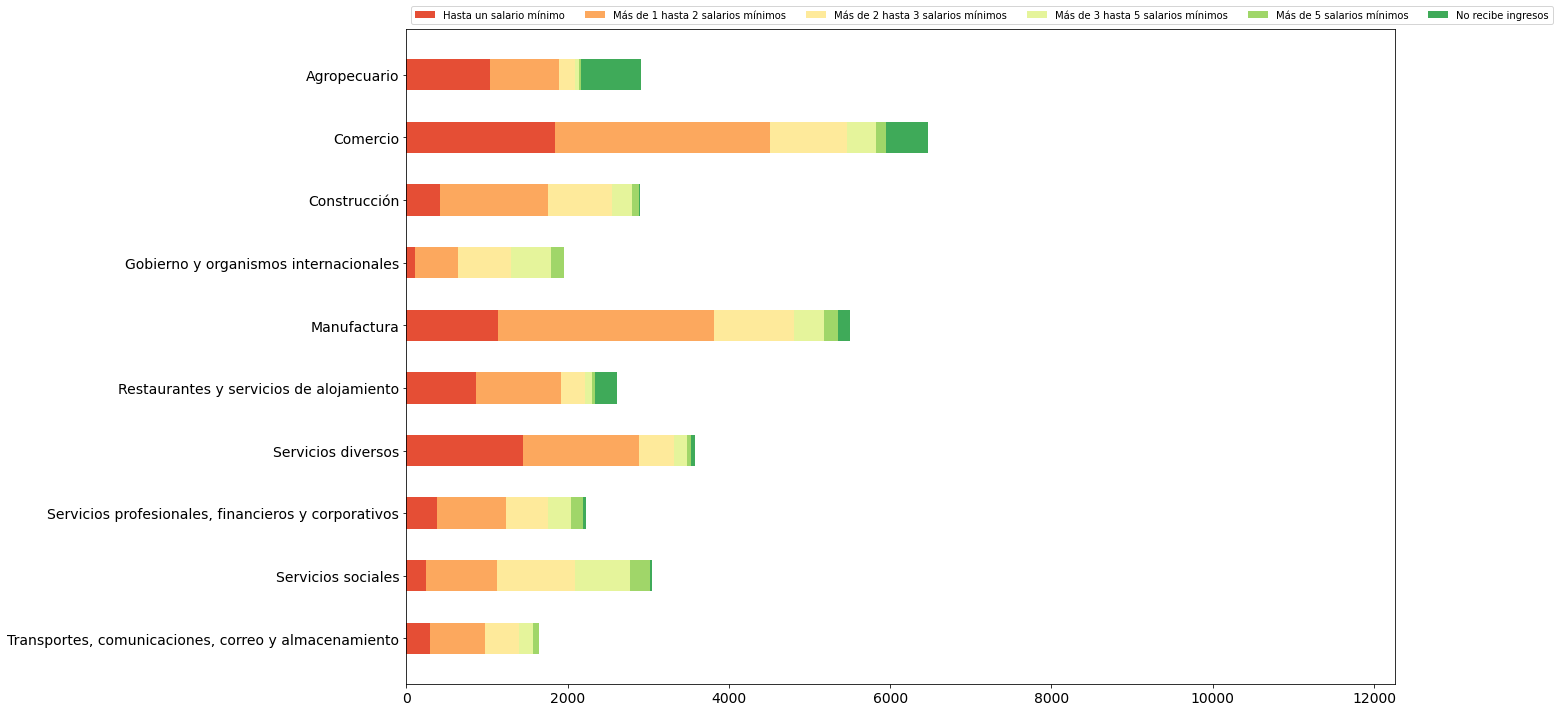

In [182]:
group2 = df[df['periodo'] == 320].groupby(by = ['sector_label','ingresos_label'])['ingresos_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)
data2.dropna(inplace=True)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

### Cuarto trimestre 2020

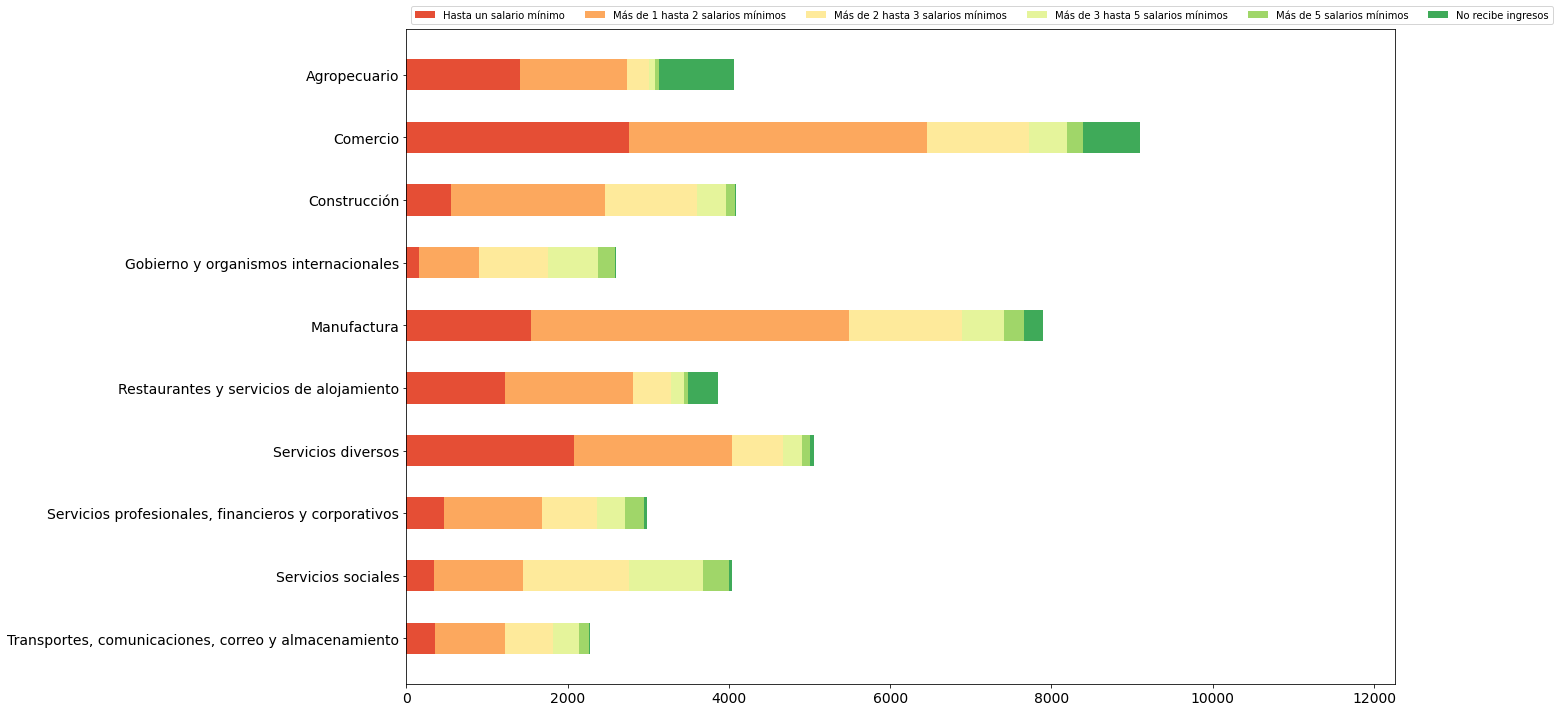

In [183]:
group2 = df[df['periodo'] == 420].groupby(by = ['sector_label','ingresos_label'])['ingresos_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)
data2.dropna(inplace=True)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

## **3. Sector y jornada laboral (Por trimestres)**

Agrupamos los datos que necesitaremos en nuestro análisis.

In [184]:
group2 = df.groupby(by = ['sector_label','jornada_label'])['jornada_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)

#Sacamos el valor máximo para las gráficas
max_value = data2.values.max()

### Primer trimestre 2020

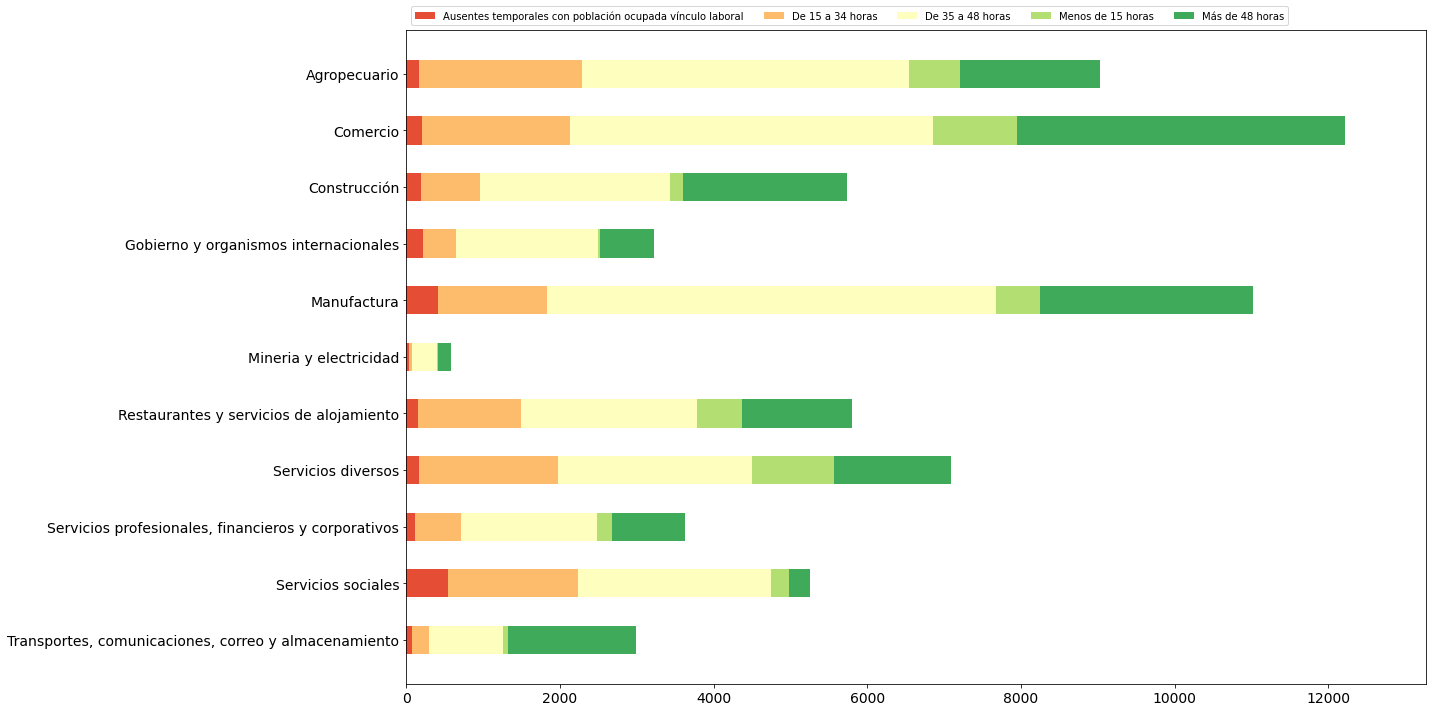

In [185]:
group2 = df[df['periodo'] == 120].groupby(by = ['sector_label','jornada_label'])['jornada_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

### Segundo trimestre 2020

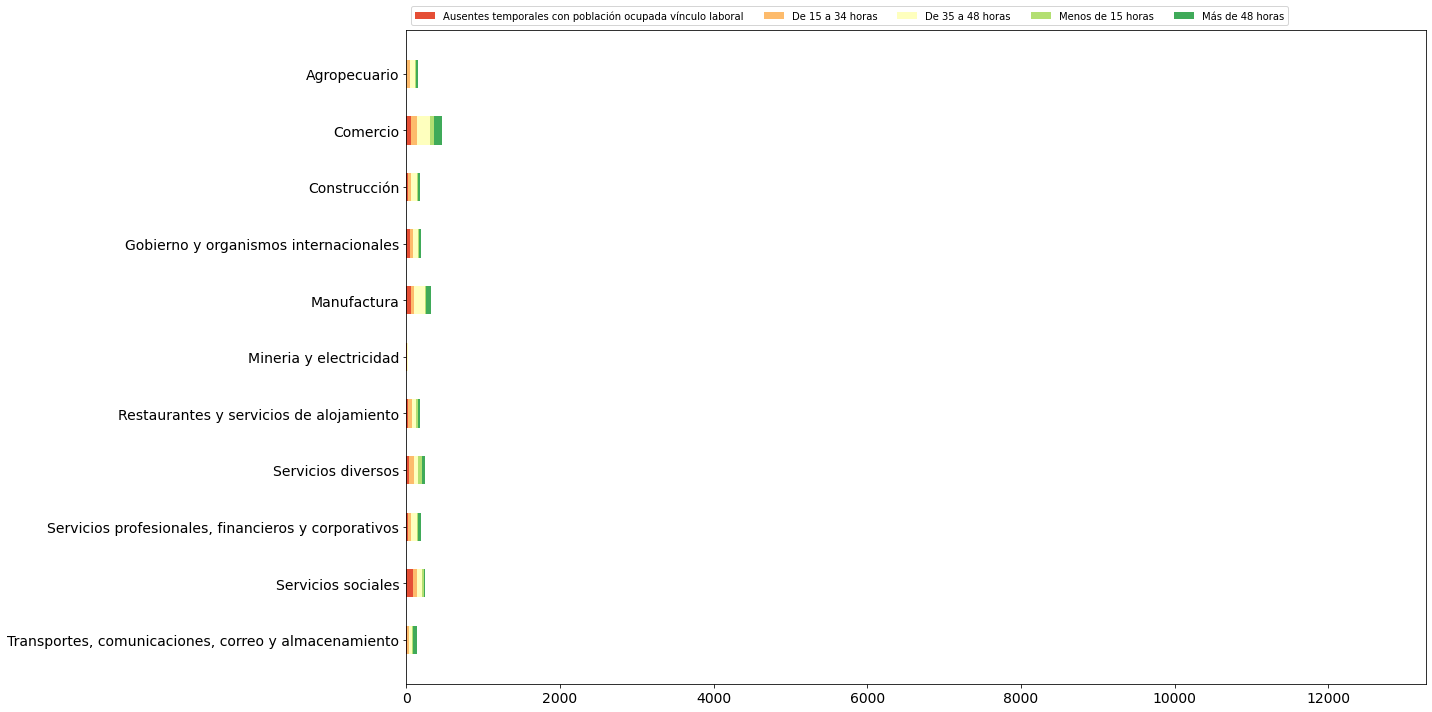

In [186]:
group2 = df[df['periodo'] == 220].groupby(by = ['sector_label','jornada_label'])['jornada_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)
data2.dropna(inplace=True)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

### Tercer trimestre 2020

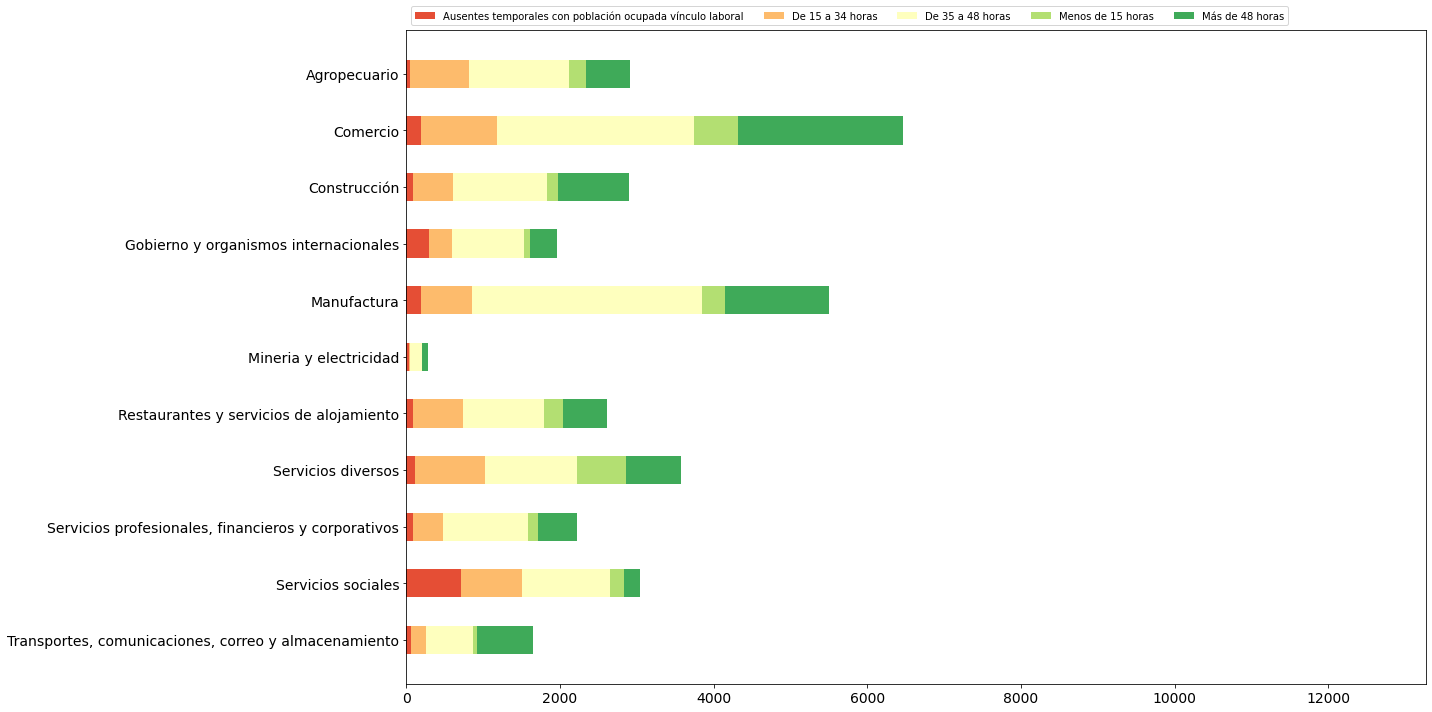

In [187]:
group2 = df[df['periodo'] == 320].groupby(by = ['sector_label','jornada_label'])['jornada_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)
data2.dropna(inplace=True)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

### Cuarto trimestre 2020

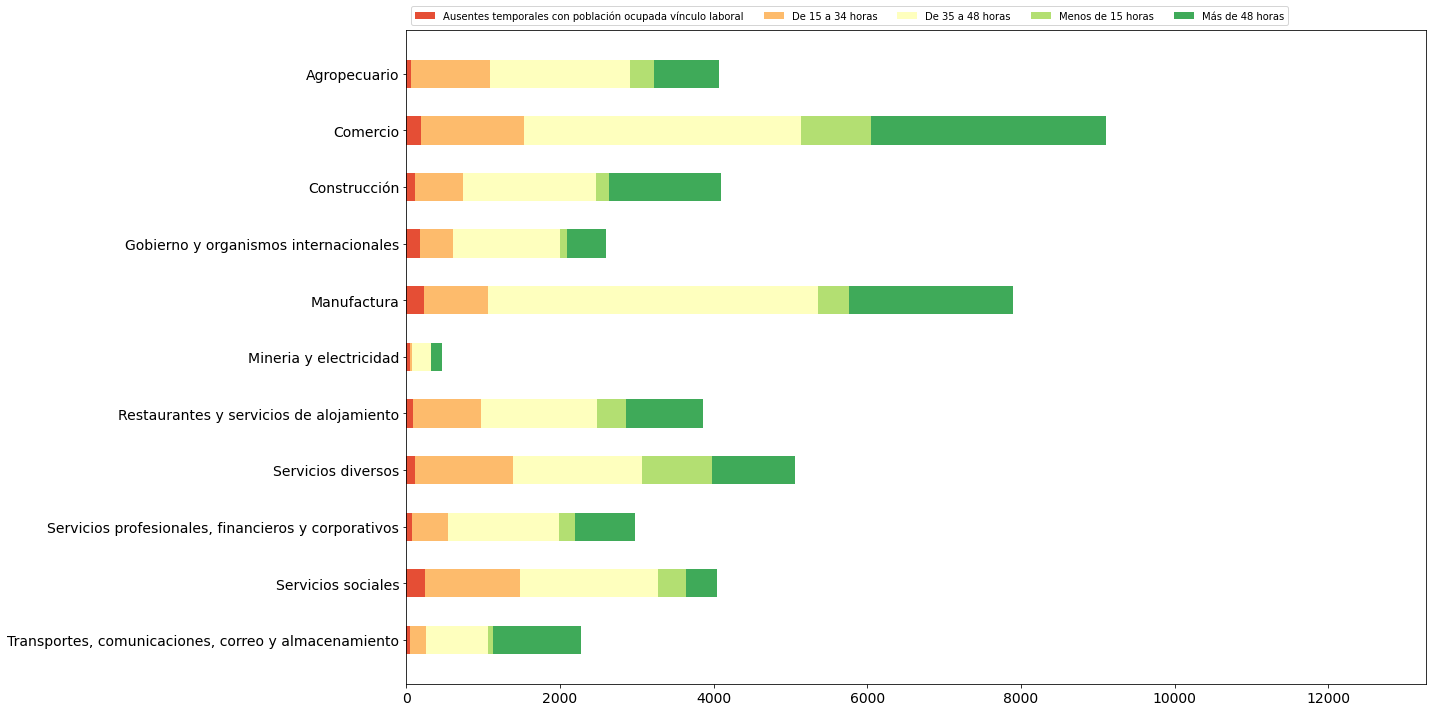

In [188]:
group2 = df[df['periodo'] == 420].groupby(by = ['sector_label','jornada_label'])['jornada_label']
data2 = group2.agg(['count'])
data2.rename(columns={'count' : 'cantidad'},inplace=True)
data2 = data2.stack().unstack(level=1).droplevel(1)
data2.dropna(inplace=True)

fig,ax = plt.subplots(figsize = (20,10))

category_names = list(data2.columns)
labels = list(data2.index)
dat = data2.values
data_cum = dat.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, dat.shape[1]))

ax.invert_yaxis()
# ax.xaxis.set_visible(False)
ax.set_xlim(0, max_value)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = dat[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    # r, g, b, _ = color
    # text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # for y, (x, c) in enumerate(zip(xcenters, widths)):
    #     ax.text(x, y, str(int(c)), ha='center', va='center',
    #             color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

## **4. Pie: Acceso a instituciones de salud sólo del sector restaurantero (por trismestres)**

Agrupamos los datos que necesitaremos en nuestro análisis.

In [ ]:
fig,ax = plt.subplots(figsize = (20,15))

## **5. Gráfica de barras: Número de empleados por cada tamaño de unidad económica del sector restaurantero (por trismestres)**

Agrupamos los datos que necesitaremos en nuestro análisis.

In [ ]:
fig,ax = plt.subplots(figsize = (20,15))

Agrupamos los datos que necesitaremos en nuestro análisis.

In [ ]:
fig,ax = plt.subplots(figsize = (20,15))

#**ANÁLISIS DE NOTAS PERIODÍSTICAS**

Análisis exploratorio de las notas periodísticas usando Procesamiento de Lenguaje Natural Básico. Con esta información se busca indagar si el tema referente al cierre de restaurantes y diferentes comercios identificados en el análisis anterior, realmente fue percibido como un problema por la población mexicana y que tipo de sentimientos fueron asociados en la propagación de las noticias. 

Las preguntas de investigación que se plantearon para este análisis fueron las siguientes:


*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al cierre de restaurantes y su efecto en la economía mexicana?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?
*   ¿Qué palabras fueron las más comunes durante este periodo de cierre y posibles reaperturas en esta pandemia?





## Definición de módulos

In [ ]:
import pandas as pd
import locale
from datetime import datetime
import plotly.express as px
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import dateutil

## Extracción de notas periodísticas con Scrapy
Scrapy fue utilizado para rastrear el sitio web de La Jornada (se puede actualizar la programación hacia otro periodico) y extraer las noticias de manera eficiente sobre las palabras clave *'restaurantes'* y *'covid'*. Con el objetivo de analizar la conversación sobre unos de los sectores economicos mas afectados durante de la pandemia, con este análisis se logro corroborar que efectivamente el cierre y la reapertura fueron temas latentes durante durante el año 2020.  Los pasos que se siguieron para la extracción de las noticias fueron los siguientes:
1. Instalar los módulos scrapy y virtualenv:

> `pip install scrapy`

> `pip install virtualenv`

2. Se crea un ambiente virtual con Python y se activa:

```
$ virtualenv scrapyvenv
$ cd scrapyvenv
$ .\Scripts\activate
```
3. Se crea un proyecto Scrapy:

```
$ scrapy startproject webscrapy
```
4. Se crea una araña o spider:

```
$ cd webscrapy
$ scrapy genspider jornada www.jornada.com.mx
```
5. Al terminar de codificar la araña, se ejecuta el siguiente comando para iniciar el proceso de extracción de información:

```
$ scrapy crawl jornada -a Keywords='restaurantes,covid' -o jornada_restaurantes.csv
```

## Exploración y trasformación inicial
1. Se leen el archivo CSV generado con la araña, el cual contiene el nombre del autor, el cuerpo de la nota periodística, la fecha de publicación, las palabras claves, el enlace, ubicación, la fuente de datos y el titulo de la noticia.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Walt9819/factores-impacto-desempleo-mexico/main/Python/data/jornada_restaurantes.csv')
data.head(10)

,author,body,date,keyWords,link,location,source,title
0,Redacción,"México, como muchos países está volviendo a re...","martes, 29 dic 2020 09:00","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/economia/20...,NaN,LaJornada.com,2020: Un año donde la diferencia la hicimos to...
1,"Héctor Briseño, Corresponsal","Acapulco, Gro., Los principales destinos turís...","lunes, 04 ene 2021 07:51","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/estados/202...,NaN,LaJornada.com,Cayó $3 mil millones la derrama turística dece...
2,Afp,Londres. La totalidad de los 56 millones de ha...,"jueves, 26 nov 2020 14:40","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,Londres,LaJornada.com,Inglaterra mantendrá importantes restricciones...
3,"Afp, Ap y Sputnik",Los Ángeles. En su lucha por controlar cifras ...,"jueves, 26 nov 2020 08:01","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,NaN,LaJornada.com,Millón y medio de infectados en América en una...
4,Rocío González Alvarado,Sábado 28 de noviembre de 2020. Una de las apu...,"sábado, 28 nov 2020 08:24","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/capital/202...,NaN,LaJornada.com,"""Alerta al límite del rojo"" en la CDMX: Shein..."
5,Afp,Londres. Más de 60 personas fueron detenidas e...,"sábado, 28 nov 2020 15:33","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,Londres.,LaJornada.com,Cientos protestan contra las restricciones Cov...
6,Josefina Quintero M.,Ciudad de México. La alerta al límite para pas...,"domingo, 29 nov 2020 08:16","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/capital/202...,Ciudad de México.,LaJornada.com,Nada frena las aglomeraciones en la CDMX
7,Alejandro Cruz Flores,Ciudad de México. El Gobierno de la Ciudad de ...,"lunes, 30 nov 2020 07:20","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/capital/202...,NaN,LaJornada.com,Sheinbaum refuerza las medidas contra aglomera...
8,Afp,"París. Europa, segunda región del mundo más en...","sábado, 28 nov 2020 15:11","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,NaN,LaJornada.com,Supera Europa 400 mil muertos por Covid-19
9,Reuters,Tokio. Tokio elevó el jueves al nivel máximo s...,"jueves, 19 nov 2020 14:15","'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,Tokio.,LaJornada.com,Eleva Tokio a nivel máximo su alerta sanitaria...


2. Se reemplazan los acronimos de los meses al idioma Ingles, para que el parser del modulo dateutil reconozca la fecha en el texto de manera automatica y se pueda convertir el string a un formato datetime.

In [ ]:
data['date'] = data['date'].str.replace(r'ago', 'aug')
data['date'] = data['date'].str.replace(r'abr', 'apr')
data['date'] = data['date'].str.replace(r'ene', 'jan')
data['date'] = data['date'].str.replace(r'dic', 'dec')
data['date'] = [dateutil.parser.parse(x, fuzzy_with_tokens=True)[0] for x in data['date']]
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

3. Se corrobora la transformación del atributo date y los nuevos atributos agregados al dataframe.

In [ ]:
data

,author,body,date,keyWords,link,location,source,title,year,month
0,Redacción,"México, como muchos países está volviendo a re...",2020-12-29 09:00:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/economia/20...,NaN,LaJornada.com,2020: Un año donde la diferencia la hicimos to...,2020,12
1,"Héctor Briseño, Corresponsal","Acapulco, Gro., Los principales destinos turís...",2021-01-04 07:51:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/estados/202...,NaN,LaJornada.com,Cayó $3 mil millones la derrama turística dece...,2021,1
2,Afp,Londres. La totalidad de los 56 millones de ha...,2020-11-26 14:40:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,Londres,LaJornada.com,Inglaterra mantendrá importantes restricciones...,2020,11
3,"Afp, Ap y Sputnik",Los Ángeles. En su lucha por controlar cifras ...,2020-11-26 08:01:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,NaN,LaJornada.com,Millón y medio de infectados en América en una...,2020,11
4,Rocío González Alvarado,Sábado 28 de noviembre de 2020. Una de las apu...,2020-11-28 08:24:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/capital/202...,NaN,LaJornada.com,"""Alerta al límite del rojo"" en la CDMX: Shein...",2020,11
...,...,...,...,...,...,...,...,...,...,...
639,Néstor Jiménez y Alonso Urrutia,Ciudad de México. México es autosuficientes en...,2020-03-31 09:13:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/economia/20...,NaN,LaJornada.com,Multas de hasta 3 mdp por alzas irregulares en...,2020,3
640,Carlos Águila Arreola/ La Jornada Maya,"Cancún. Los cines, bares, discotecas, casinos ...",2020-03-18 20:03:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/estados/202...,Cancún,LaJornada.com,Cancún cerrará todo giro comercial para evitar...,2020,3
641,Lilián Anaya @Lilian_Anaya,Ciudad de México. Uber Eats informó que une es...,2020-03-23 16:00:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/tiempo-de-i...,Ciudad de México,LaJornada.com,"Uber Eats apoya a restaurantes, repartidores y...",2020,3
642,Ap,La Habana. Un millar de cruceristas y la tripu...,2020-03-18 15:40:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,La Habana.,LaJornada.com,Desembarcan en Cuba pasajeros de crucero recha...,2020,3


4. Se cuentan los números de registros extraídos por año

In [ ]:
count_year = data.groupby('year').count()[['link']].reset_index().rename(columns={'link': 'count'})
count_year

,year,count
0,2020,643
1,2021,1


5. Al identificar que del año 2021 se extrajo una sola nota, se procede a eliminar para hacer un análisis en el año del interes.

In [ ]:
mask = (data['year'] == 2020)
data = data.loc[mask]
data.shape

(643, 10)

6. Con esta modificación, se procede a analizar en cuales meses se cuenta con mayor número de noticias ejecutando un group by y conteo por enlace (link).

In [ ]:
count_month = data.groupby('month').count()[['link']].reset_index().rename(columns={'link': 'count'})
count_month

,month,count
0,2,2
1,3,98
2,4,62
3,5,106
4,6,91
5,7,76
6,8,31
7,9,41
8,10,82
9,11,53


7. Se logra identificar una alza el número de notas periodisticas sobre los restaurantes en los meses de Marzo y Mayo, cuando al inicio de la pandemia el 22 de Marzo en la Ciudad de México se anunciaron las nuevas medidas para evitar el contagio. En el mes de Mayo, se debe por la baja demanda de restaurantes o eventos relativos al día de las madres.

In [ ]:
fig = px.bar(count_month, x="month", y="count")
fig.show()

In [ ]:
data_month = data.groupby(['month'])['body'].apply(' '.join).reset_index()
data_month = data_month.set_index('month')
data_month

,body
month,
2,Seúl. Corea del Norte anunció un arsenal de me...
3,"Mérida, Yuc. Para disminuir en todo lo posible..."
4,"Teotihuacán, Méx. Un grupo de comerciantes y a..."
5,Berlín. Alemania prolongará hasta el 29 de jun...
6,Ciudad de México. De los 121 mil 765 estableci...
7,Lima. El gobierno peruano informó este miércol...
8,Londres. Las medidas para evitar la propagació...
9,Ciudad de México. Dirigentes de asociaciones d...
10,Bruselas. Bélgica impondrá reglas de confinami...


In [ ]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
 
round1 = lambda x: clean_text_round1(x)
 
data_clean = pd.DataFrame(data_month.body.apply(round1))

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.body.apply(round2))
data_clean


,body
month,
2,seúl corea del norte anunció un arsenal de me...
3,mérida yuc para disminuir en todo lo posible...
4,teotihuacán méx un grupo de comerciantes y a...
5,berlín alemania prolongará hasta el de junio...
6,ciudad de méxico de los mil establecimiento...
7,lima el gobierno peruano informó este miércol...
8,londres las medidas para evitar la propagació...
9,ciudad de méxico dirigentes de asociaciones d...
10,bruselas bélgica impondrá reglas de confinami...


In [ ]:
import base64
import requests

master = "https://raw.githubusercontent.com/Walt9819/factores-impacto-desempleo-mexico/main/Python/data/spanish.txt"
req = requests.get(master)
lines = req.text.split(sep='\n')

In [ ]:
cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.body)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm

,abad,abajo,abandonados,abandonando,abandonar,abandonaron,abandonen,abandonó,abanico,abaratamiento,abarca,abarrotadas,abarrotado,abarrotados,abarrotaron,abarrotará,abarrotes,abarrotó,abascal,abasolo,abastecedor,abastecen,abastecer,abastecerse,abastecimiento,abasto,abastos,abatir,abbot,abbott,abc,abdo,abdool,abdulá,abel,abelardo,abierta,abiertamente,abiertas,abierto,...,ésto,éstos,étnico,éxito,éxodo,íbamos,índice,índices,índico,íntegro,íñigo,ópera,ópticas,óptimas,óptimo,órdenes,órgano,órganos,óscar,última,últimas,último,últimos,única,únicamente,únicas,único,únicos,úrkullu,útil,útiles,𝐋𝐢𝐧𝐞𝐚𝐦𝐢𝐞𝐧𝐭𝐨,𝐍𝐚𝐜𝐢𝐨𝐧𝐚𝐥,𝐑𝐞𝐚𝐩𝐞𝐫𝐭𝐮𝐫𝐚,𝐒𝐞𝐜𝐭𝐨𝐫,𝐓𝐮𝐫𝐢,𝐝𝐞𝐥,𝐥𝐚,𝐩𝐚𝐫𝐚,𝐬𝐭𝐢𝐜𝐨
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,5,0,0,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,0,0,1,0,3,3,...,0,1,2,3,0,0,1,0,0,1,2,0,0,1,0,2,1,4,1,11,10,10,11,3,4,0,3,0,2,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,2,0,0,1,0,1,0,0,0,12,0,0,0,0,0,2,0,0,8,0,0,0,1,0,0,0,0,2,1,1,0,1,1,...,0,3,0,0,1,1,2,0,0,0,0,0,0,0,0,3,0,0,1,4,7,9,4,0,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,2,7,...,0,0,0,4,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,2,33,12,13,3,6,0,2,1,0,0,0,1,1,1,1,1,1,1,1,1
6,0,2,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1,0,3,6,...,1,1,0,2,0,1,2,2,1,0,0,0,0,1,0,4,0,1,0,4,15,8,13,1,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,1,1,2,1,...,0,2,0,1,0,0,2,1,0,0,0,0,2,0,0,1,0,0,0,4,14,6,6,4,4,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,1,2,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,3,3,3,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,4,9,2,7,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,8,2,...,0,2,0,1,0,2,4,1,0,0,0,2,0,1,1,1,0,0,0,8,21,11,17,1,2,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
dt_data = data_dtm.transpose()
dt_data.head()

month,2,3,4,5,6,7,8,9,10,11,12
abad,0,0,0,1,0,0,0,0,0,0,0
abajo,0,0,0,0,2,1,0,0,0,0,0
abandonados,0,1,1,0,0,0,0,0,0,0,0
abandonando,0,0,0,0,0,0,1,0,0,0,0
abandonar,0,1,1,1,2,1,0,0,0,1,0


In [ ]:
top_dict = {}
for c in dt_data.columns:
    top = dt_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

for month, top_words in top_dict.items():
    print(month)
    print(', '.join([word+' '+str(count) for word, count in top_words[0:14]]))

2
coronavirus 10, país 9, irán 6, casos 6, países 6, corea 6, ahora 5, según 5, irak 5, norte 5, china 5, hadj 5, saudita 5, año 5
3
mil 237, covid 182, país 159, medidas 152, restaurantes 147, personas 147, gobierno 141, ciudad 139, méxico 130, salud 128, coronavirus 115, casos 112, ciento 108, pandemia 88
4
mil 179, covid 115, personas 96, pandemia 90, gobierno 88, millones 86, restaurantes 82, país 79, salud 79, coronavirus 77, méxico 73, medidas 71, ciento 63, ciudad 63
5
mil 454, covid 236, coronavirus 221, pandemia 192, ciento 166, país 144, millones 144, dos 141, restaurantes 140, personas 130, medidas 124, muertos 122, mayo 121, gobierno 119
6
ciento 242, mil 236, covid 149, restaurantes 132, casos 117, medidas 115, actividades 109, méxico 109, personas 104, pandemia 104, coronavirus 95, dijo 93, semáforo 90, ciudad 82
7
mil 194, ciento 171, covid 137, ciudad 135, méxico 132, restaurantes 124, casos 115, personas 109, pandemia 98, medidas 98, país 80, millones 77, contagios 75,

In [ ]:
from collections import Counter

words = []
for anio in dt_data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('país', 11), ('casos', 10), ('mil', 10), ('covid', 10), ('personas', 10), ('méxico', 10), ('millones', 10), ('coronavirus', 9), ('medidas', 9), ('restaurantes', 9), ('gobierno', 9), ('ciudad', 9), ('salud', 9), ('ciento', 9), ('pandemia', 9), ('contagios', 8), ('dijo', 7), ('número', 6), ('actividades', 6), ('según', 5), ('autoridades', 4), ('parte', 4), ('días', 4), ('semana', 4), ('dos', 4), ('si', 4), ('año', 3), ('turismo', 3), ('cierre', 3), ('así', 3), ('mientras', 3), ('sector', 3), ('menos', 3), ('lunes', 3), ('restricciones', 3), ('países', 2), ('nuevo', 2), ('centros', 2), ('virus', 2), ('servicios', 2), ('crisis', 2), ('empresas', 2), ('meses', 2), ('mundo', 2), ('europa', 2), ('reapertura', 2), ('negocios', 2), ('mayor', 2), ('horas', 2), ('bares', 2), ('confinamiento', 2), ('irán', 1), ('corea', 1), ('ahora', 1), ('irak', 1), ('norte', 1), ('china', 1), ('hadj', 1), ('saudita', 1), ('embajador', 1), ('embajada', 1), ('ciudades', 1), ('religioso', 1), ('peregrinos', 1), (

['país',
 'casos',
 'mil',
 'covid',
 'personas',
 'méxico',
 'millones',
 'coronavirus',
 'medidas',
 'restaurantes',
 'gobierno',
 'ciudad',
 'salud',
 'ciento',
 'pandemia',
 'contagios',
 'dijo']

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = req.text.split(sep='\n')
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['día','nuevo','según','si','hora','año','function', 'recomendamos', 'west', 'texas wti', 'además', 'intermediate', 'display','ad','gpt','dijo','div','más','también', 'interarticle','pues','parte','está', 'cmd', 'push', 'googletag','alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.body)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['texas', 'wti'] not in stop_words.



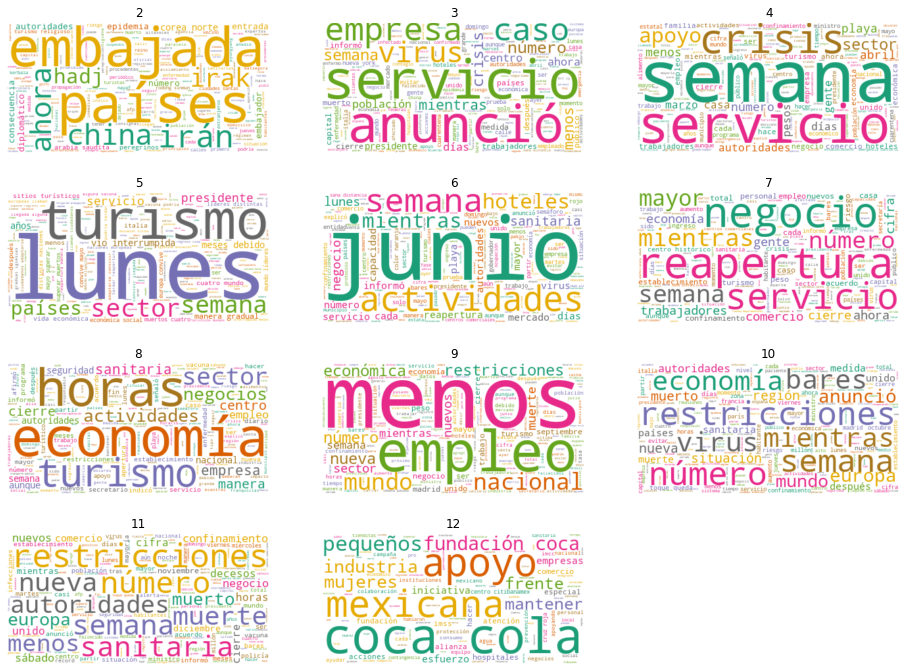

In [ ]:
from wordcloud import WordCloud
anios = ['2','3','4','5','6','7','8','9','10','11','12']

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

for index, mes in enumerate(dt_data.columns):
    wc.generate(data_clean.body[mes])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()

## **Análisis de sentimientos**
Para cada noticia se analiza su polaridad y subjetividad, la primera asigna un valor positivo o negativo dependiendo del sentimiento identificado. 

# ADVERTENCIA: Este fragmento del código tarda debido a la traducción al idioma inglés con el modulo textblob.

In [ ]:
import nltk
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

traducir = lambda x: TextBlob(x).translate(to="en")

data['blob_en'] = data['body'].apply(traducir)
data['polarity'] = data['blob_en'].apply(pol2)
data['subjectivity'] = data['blob_en'].apply(sub2)
data.to_csv('translated_news.csv')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Walt9819/factores-impacto-desempleo-mexico/main/Python/data/translated_news.csv')
data

,Unnamed: 0,author,body,date,keyWords,link,location,source,title,year,month,blob_en,polarity,subjectivity
0,0,Redacción,"México, como muchos países está volviendo a re...",2020-12-29 09:00:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/economia/20...,NaN,LaJornada.com,2020: Un año donde la diferencia la hicimos to...,2020,12,"Mexico, like many countries, is gradually retu...",0.124086,0.317400
1,2,Afp,Londres. La totalidad de los 56 millones de ha...,2020-11-26 14:40:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,Londres,LaJornada.com,Inglaterra mantendrá importantes restricciones...,2020,11,London. The entire 56 million inhabitants of E...,0.101292,0.413893
2,3,"Afp, Ap y Sputnik",Los Ángeles. En su lucha por controlar cifras ...,2020-11-26 08:01:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,NaN,LaJornada.com,Millón y medio de infectados en América en una...,2020,11,The Angels. In their struggle to control histo...,0.055917,0.354411
3,4,Rocío González Alvarado,Sábado 28 de noviembre de 2020. Una de las apu...,2020-11-28 08:24:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/capital/202...,NaN,LaJornada.com,"""Alerta al límite del rojo"" en la CDMX: Shein...",2020,11,"Saturday November 28, 2020. One of the capital...",0.085129,0.379125
4,5,Afp,Londres. Más de 60 personas fueron detenidas e...,2020-11-28 15:33:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,Londres.,LaJornada.com,Cientos protestan contra las restricciones Cov...,2020,11,London. More than 60 people were arrested this...,0.079821,0.278444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,639,Néstor Jiménez y Alonso Urrutia,Ciudad de México. México es autosuficientes en...,2020-03-31 09:13:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/economia/20...,NaN,LaJornada.com,Multas de hasta 3 mdp por alzas irregulares en...,2020,3,Mexico City. Mexico is self-sufficient in whit...,0.014323,0.327404
639,640,Carlos Águila Arreola/ La Jornada Maya,"Cancún. Los cines, bares, discotecas, casinos ...",2020-03-18 20:03:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/estados/202...,Cancún,LaJornada.com,Cancún cerrará todo giro comercial para evitar...,2020,3,"Cancun. The cinemas, bars, discos, casinos and...",0.131190,0.402234
640,641,Lilián Anaya @Lilian_Anaya,Ciudad de México. Uber Eats informó que une es...,2020-03-23 16:00:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/tiempo-de-i...,Ciudad de México,LaJornada.com,"Uber Eats apoya a restaurantes, repartidores y...",2020,3,Mexico City. Uber Eats reported that it joins ...,0.067333,0.382048
641,642,Ap,La Habana. Un millar de cruceristas y la tripu...,2020-03-18 15:40:00,"'restaurantes,covid'",https://www.jornada.com.mx/ultimas/mundo/2020/...,La Habana.,LaJornada.com,Desembarcan en Cuba pasajeros de crucero recha...,2020,3,Havana. A thousand cruise passengers and the c...,0.185659,0.312875


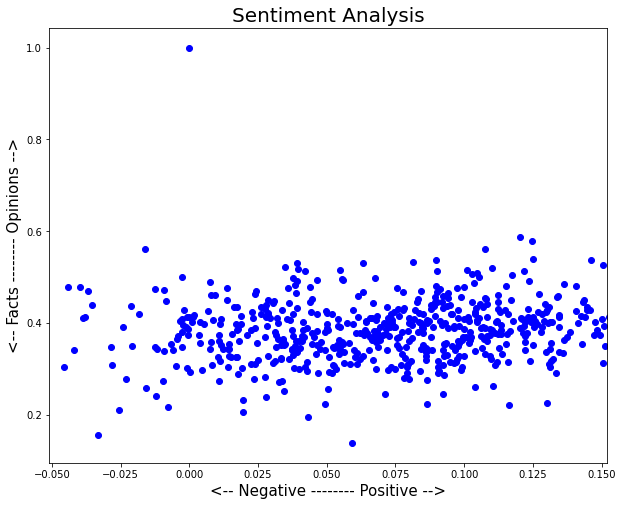

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data.index):
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
fig = px.histogram(data, x="polarity", nbins=50)
fig.show()

In [ ]:
data = data.sort_values(by=['date'])

In [ ]:
fig = px.line(data, x="date", y="polarity")
fig.show()